# PRODUCT_SALES_FORECASTING
# EDA




In [1]:
# Basic packages
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical tests
from scipy import stats

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set_style('whitegrid')

# Warning settings (optional, to ignore warnings)
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("C:\Product_Sale_Forecasting\data\TRAIN.csv")
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,01-01-2018,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,01-01-2018,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,01-01-2018,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,01-01-2018,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,01-01-2018,1,Yes,62,45614.52


In [3]:
df.tail()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
188335,T1188336,149,S2,L3,R2,31-05-2019,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,31-05-2019,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,31-05-2019,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,31-05-2019,1,Yes,70,49162.41
188339,T1188340,152,S2,L1,R1,31-05-2019,1,No,47,37977.00


In [4]:
df.shape

(188340, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [6]:
df.describe(include=object)

,ID,Store_Type,Location_Type,Region_Code,Date,Discount
count,188340,188340,188340,188340,188340,188340
unique,188340,4,5,4,516,2
top,T1000001,S1,L1,R1,01-01-2018,No
freq,1,88752,85140,63984,365,104051


In [7]:
#checking for duplicated values
df.duplicated().sum()

0

In [8]:
df.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date', 'Holiday', 'Discount', '#Order', 'Sales'], dtype='object')

In [9]:
# Checking for Missing Values
df.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

* There are no missing values in the dataset|

In [10]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [11]:
df.dtypes

ID                       object
Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                 object
#Order                    int64
Sales                   float64
dtype: object

In [12]:
# Percentage of missing values
df.isnull().mean()*100



ID               0.0
Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Date             0.0
Holiday          0.0
Discount         0.0
#Order           0.0
Sales            0.0
dtype: float64

In [13]:
#checking the number of stores we have
df.Store_id.value_counts()

1      516
61     516
63     516
64     516
65     516
      ... 
338    516
349    516
350    516
351    516
364    516
Name: Store_id, Length: 365, dtype: int64

In [14]:
#Checking how many store_types we have
df.Store_Type.value_counts()

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

In [15]:
#Checking how many location types we have
df.Location_Type.value_counts()

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

In [16]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

ID: 188340 unique values
Store_id: 365 unique values
Store_Type: 4 unique values
Location_Type: 5 unique values
Region_Code: 4 unique values
Date: 516 unique values
Holiday: 2 unique values
Discount: 2 unique values
#Order: 299 unique values
Sales: 47416 unique values


# UNIVARIATE ANALYSIS
* Numerical Features ( SALES , ORDER )


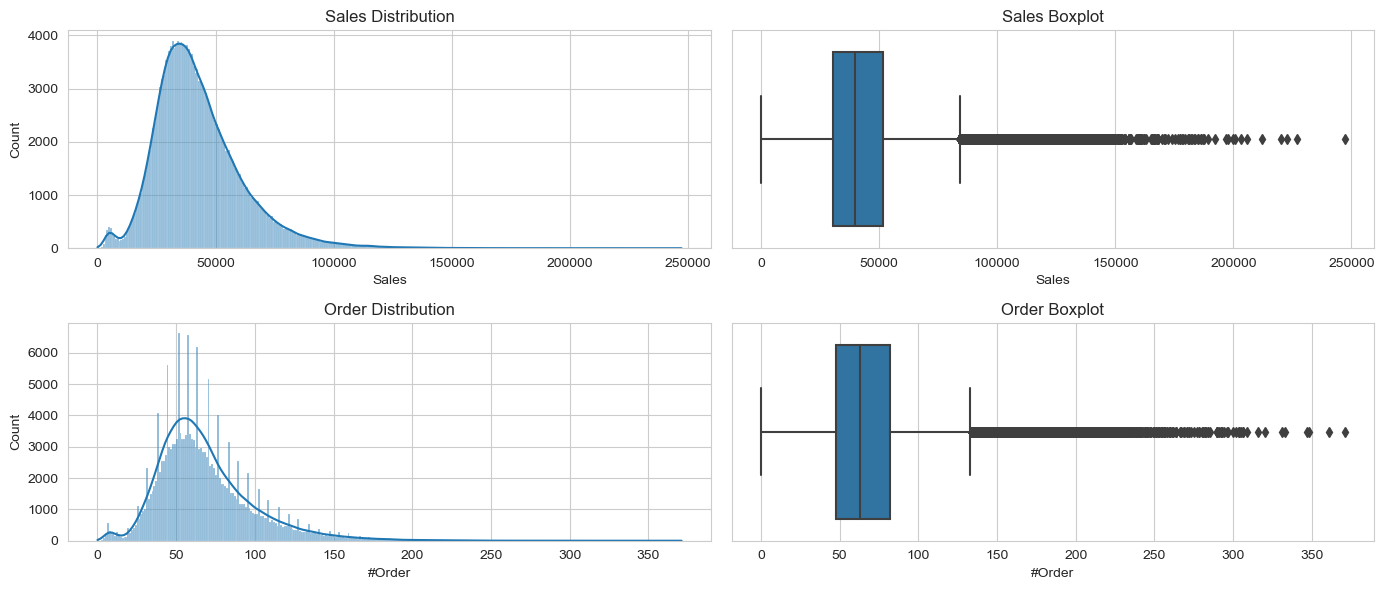

In [17]:
plt.figure(figsize=(14, 6))

# Plot histogram for Sales
plt.subplot(2, 2, 1)
sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')

# Plot boxplot for Sales
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Sales'])
plt.title('Sales Boxplot')

# Plot histogram for Order
plt.subplot(2, 2, 3)
sns.histplot(df['#Order'], kde=True)
plt.title('Order Distribution')

# Plot boxplot for Order
plt.subplot(2, 2, 4)
sns.boxplot(x=df['#Order'])
plt.title('Order Boxplot')

plt.tight_layout()
plt.show()


In [18]:
# Summary statistics for Sales and Order
print(df[['Sales', '#Order']].describe())


               Sales         #Order
count  188340.000000  188340.000000
mean    42784.327982      68.205692
std     18456.708302      30.467415
min         0.000000       0.000000
25%     30426.000000      48.000000
50%     39678.000000      63.000000
75%     51909.000000      82.000000
max    247215.000000     371.000000


* Categorical Features

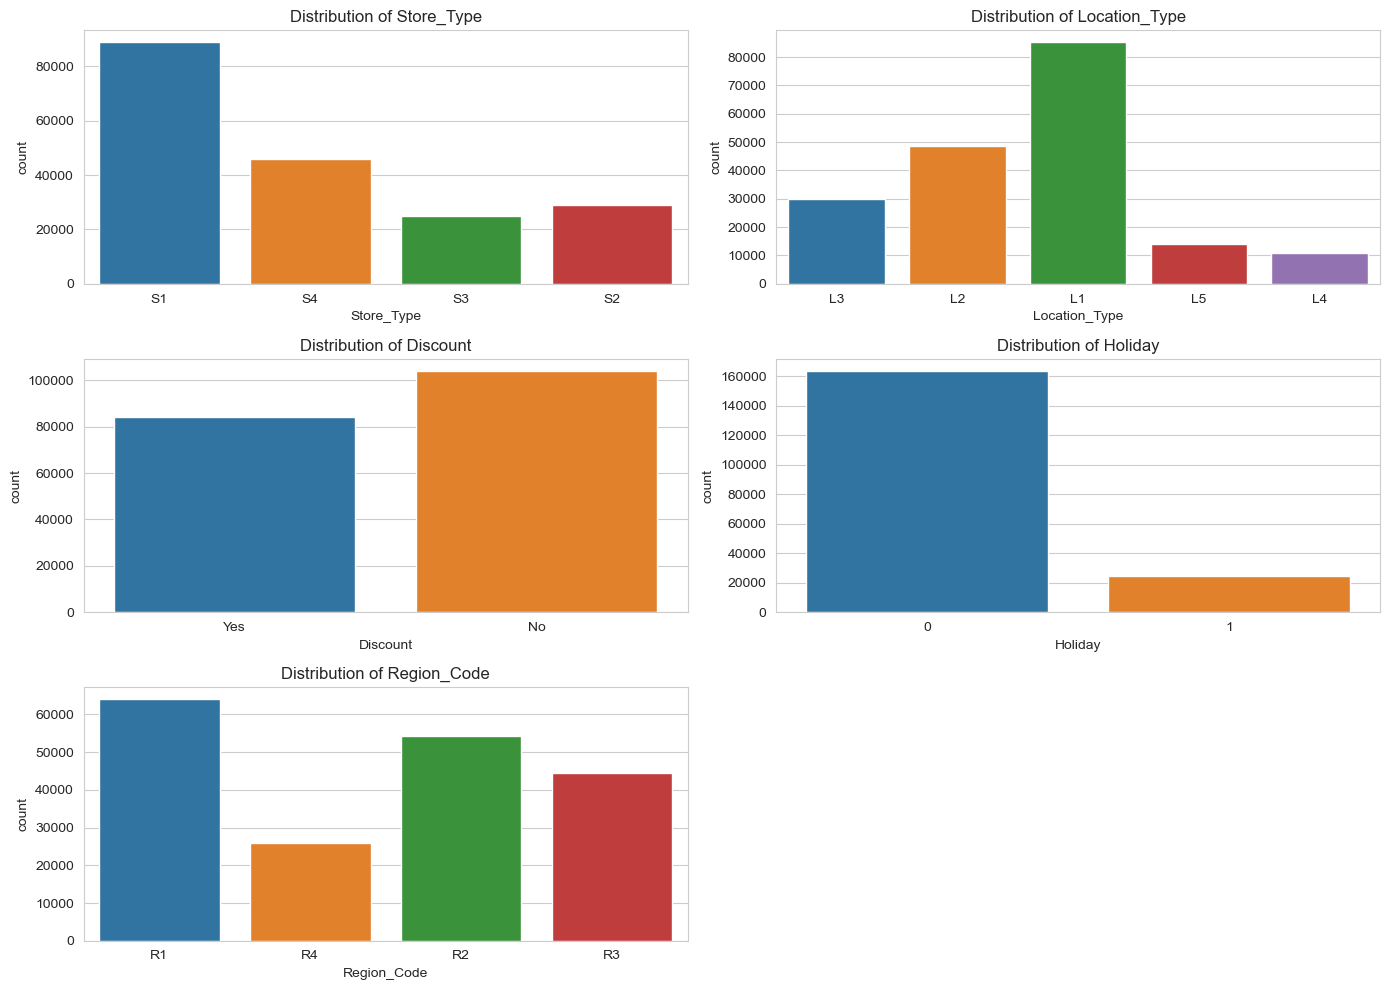

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Store_Type', 'Location_Type', 'Discount', 'Holiday', 'Region_Code']

# Set up the figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))  # 3 rows, 2 columns
axes = axes.flatten()  # Flatten to easily iterate

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Remove empty subplot if number of plots is odd
if len(cols) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


# BIVARIATE ANALYSIS
* Numerical Vs Numerical

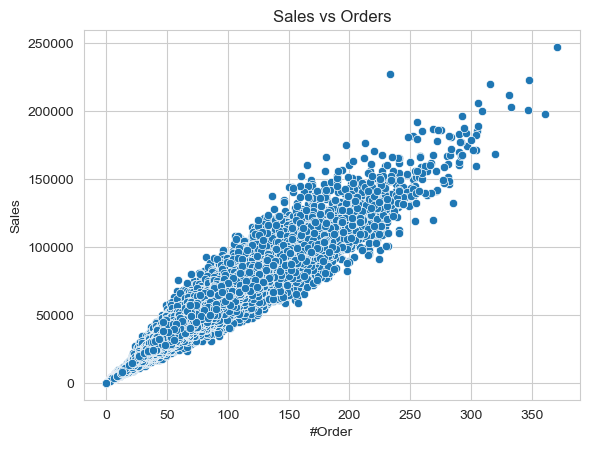

In [20]:
sns.scatterplot(x='#Order', y='Sales', data=df)
plt.title('Sales vs Orders')
plt.show()


* Numerical Vs Categorical

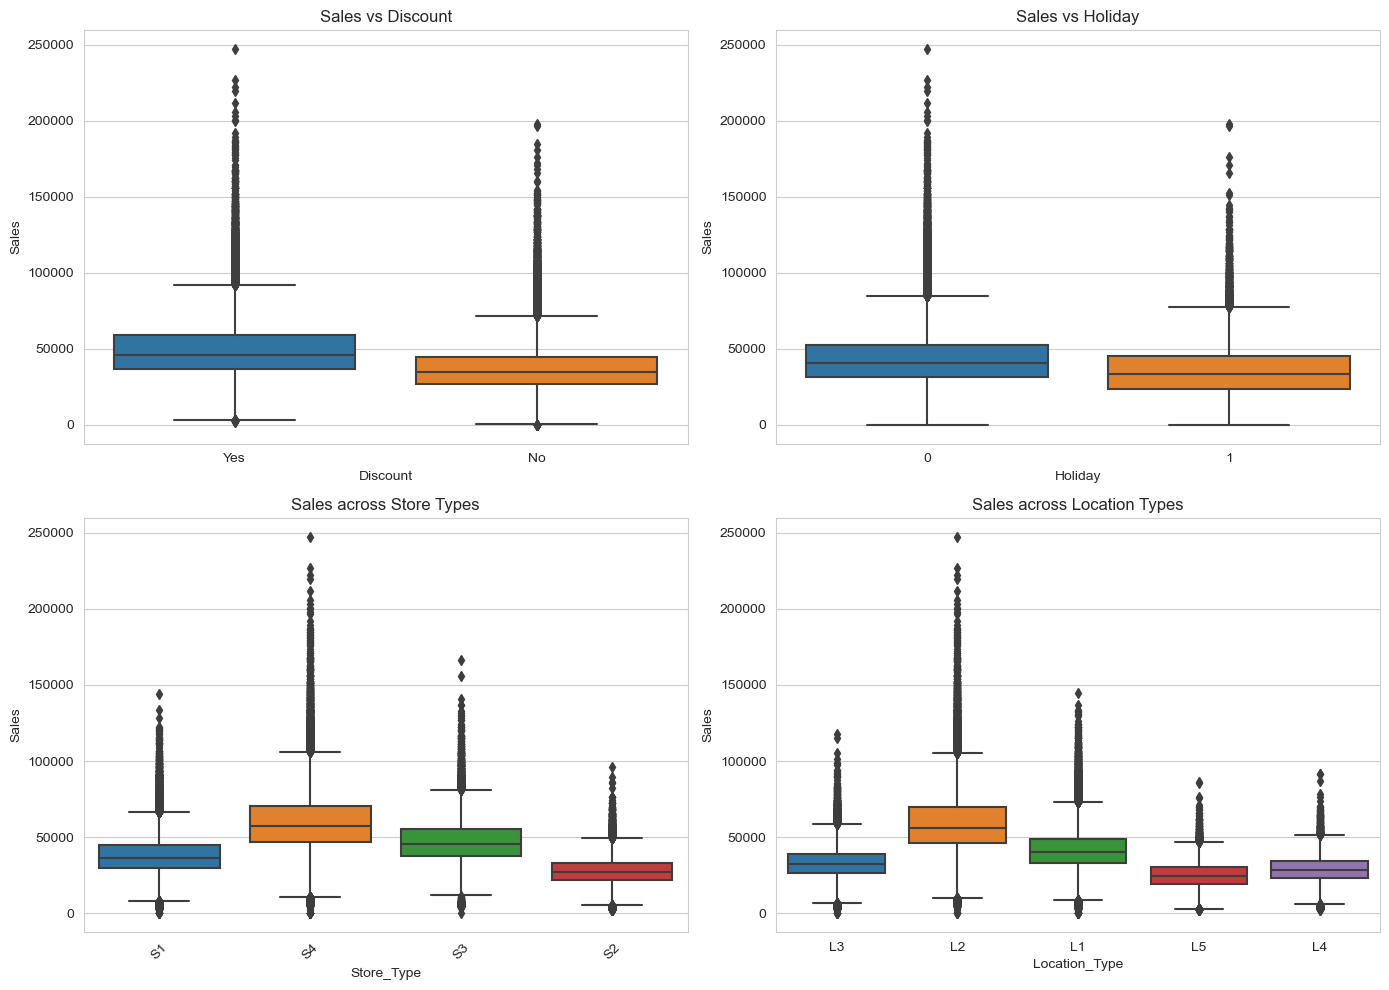

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Discount vs Sales
sns.boxplot(x='Discount', y='Sales', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Sales vs Discount')

# 2. Holiday vs Sales
sns.boxplot(x='Holiday', y='Sales', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Sales vs Holiday')

# 3. Store Type vs Sales
sns.boxplot(x='Store_Type', y='Sales', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Sales across Store Types')
axes[1, 0].tick_params(axis='x', rotation=45)  # Rotate labels if needed

# 4. Location Type vs Sales
sns.boxplot(x='Location_Type', y='Sales', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Sales across Location Types')

# Adjust layout
plt.tight_layout()
plt.show()


* Correlation Analysis

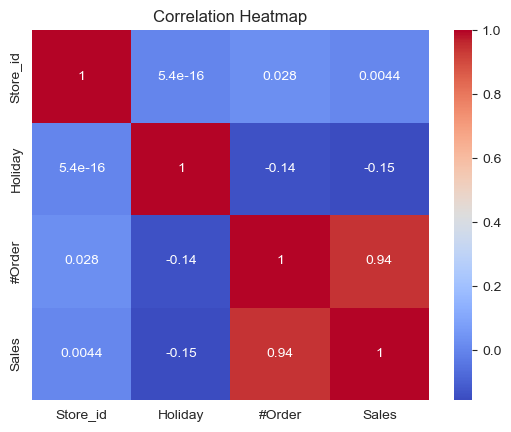

In [22]:
corr = df.corr(numeric_only=True)   # Add numeric_only to avoid errors
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

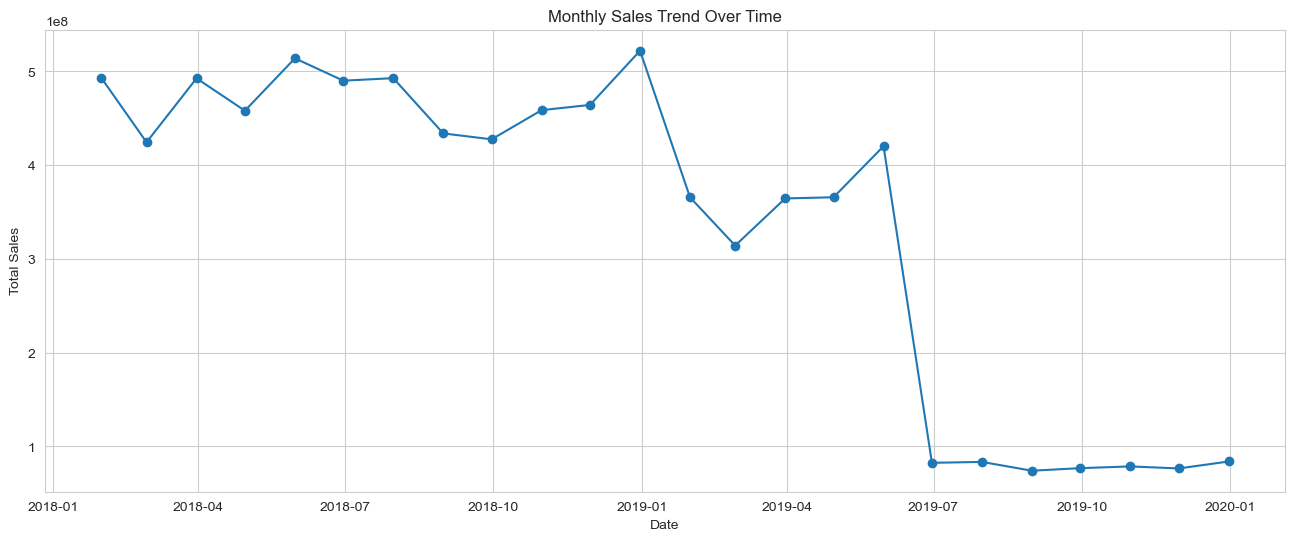

In [23]:
# Step 1: Ensure 'Date' is datetime type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 2: Set 'Date' as index
df = df.set_index('Date')

# Step 3: Resample to Monthly Sales
df_monthly_sales = df['Sales'].resample('M').sum()

# Step 4: Plot Monthly Sales Trend
plt.figure(figsize=(16, 6))
plt.plot(df_monthly_sales, marker='o', linestyle='-')
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


# Outlier Treatment

* Detecting outliers using BOX-PLOT

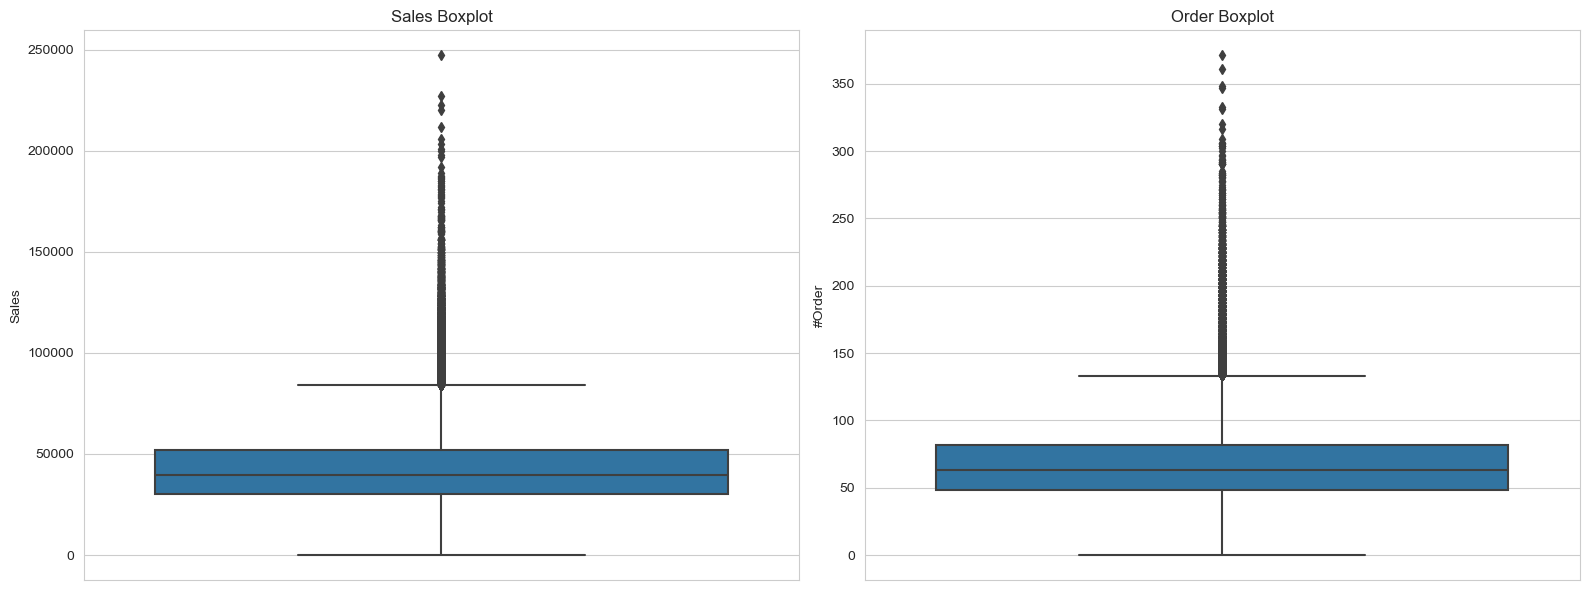

In [24]:
# Boxplots for 'Sales' and 'Order'
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sales boxplot
sns.boxplot(y=df['Sales'], ax=axes[0])
axes[0].set_title('Sales Boxplot')

# Order boxplot
sns.boxplot(y=df['#Order'], ax=axes[1])
axes[1].set_title('Order Boxplot')

plt.tight_layout()
plt.show()


* Outlier Detection through IQR METHOD

In [25]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers
sales_outliers = detect_outliers_iqr(df, 'Sales')
order_outliers = detect_outliers_iqr(df, '#Order')

print(f"Number of Sales Outliers: {sales_outliers.shape[0]}")
print(f"Number of Order Outliers: {order_outliers.shape[0]}")


Number of Sales Outliers: 5843
Number of Order Outliers: 7089
